In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [25]:
# Extração / Obtenção de Dados

tabela = pd.read_csv("advertising.csv")


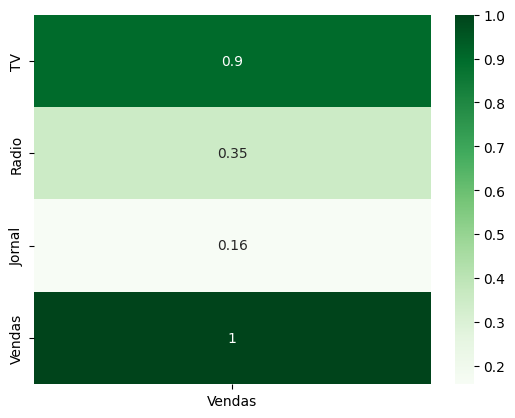

In [26]:
# Análise Exploratória

correlacao = tabela.corr()[["Vendas"]]

sns.heatmap(correlacao, annot=True, cmap="Greens")

plt.show()

In [27]:
# Modelagem + Algoritimos

y = tabela["Vendas"]

x = tabela.drop("Vendas",axis=1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

In [28]:
# criação da IA

modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# Treinamento da IA

modelo_regressaolinear.fit(x_treino,y_treino)
modelo_arvoredecisao.fit(x_treino,y_treino)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
# Interpretação dos Resultados

# fazer as previsões
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)

# comparar a previssão com y_teste

print(r2_score(y_teste, previsao_arvoredecisao))
print(r2_score(y_teste, previsao_regressaolinear))



0.9319848783367092
0.8319867302941375


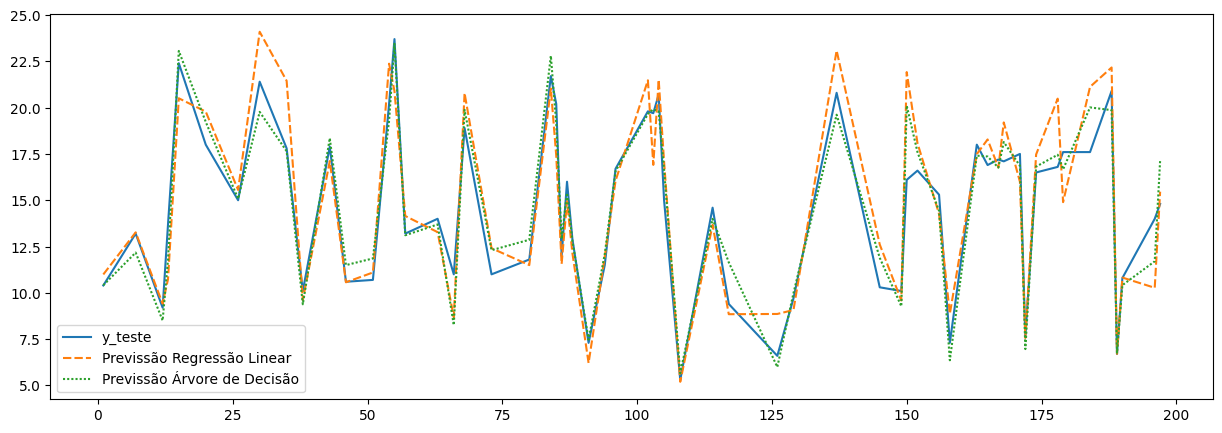

In [31]:
# Visualização Gráfica das Previsões

tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previssão Regressão Linear"] = previsao_regressaolinear
tabela_auxiliar["Previssão Árvore de Decisão"] = previsao_arvoredecisao

plt.figure(figsize=(15,5))
sns.lineplot(data=tabela_auxiliar)
plt.show()


In [32]:
# Fazendo uma nova previsão

tabela_nova = pd.read_csv("novos.csv")

previsao = modelo_arvoredecisao.predict(tabela_nova)

print(previsao)

[ 7.381  8.102 20.104]
